In [1]:
!pip install numpy matplotlib



Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 16.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 19.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 21.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.0/312.0 KB 15.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

/tmp/ipykernel_1555/2392399063.py:46: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, animate, interval=100, blit=False)


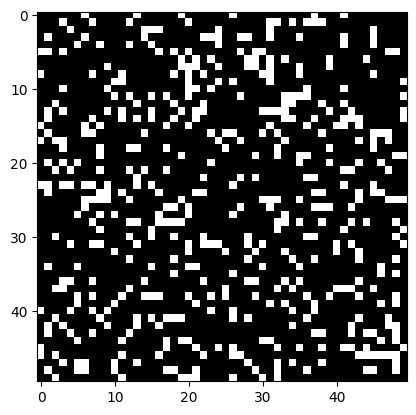

In [15]:

# Grid size
GRID_SIZE = 50

def random_grid(size):
    """Generate a random grid of 0s and 1s."""
    return np.random.choice([0, 1], size=(size, size), p=[0.8, 0.2])

def update(grid):
    """Compute next generation based on Game of Life rules."""
    new_grid = grid.copy()
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            # Count live neighbors
            neighbors = sum([
                grid[i, (j-1) % GRID_SIZE], grid[i, (j+1) % GRID_SIZE],  # Left & Right
                grid[(i-1) % GRID_SIZE, j], grid[(i+1) % GRID_SIZE, j],  # Top & Bottom
                grid[(i-1) % GRID_SIZE, (j-1) % GRID_SIZE],  # Top Left
                grid[(i-1) % GRID_SIZE, (j+1) % GRID_SIZE],  # Top Right
                grid[(i+1) % GRID_SIZE, (j-1) % GRID_SIZE],  # Bottom Left
                grid[(i+1) % GRID_SIZE, (j+1) % GRID_SIZE]   # Bottom Right
            ])
            
            # Apply Conway's rules
            if grid[i, j] == 1 and (neighbors < 2 or neighbors > 3):
                new_grid[i, j] = 0  # Dies
            elif grid[i, j] == 0 and neighbors == 3:
                new_grid[i, j] = 1  # Becomes alive
    
    return new_grid

# Initialize grid
grid = random_grid(GRID_SIZE)

# Set up figure
fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='nearest', cmap='gray')

def animate(frame):
    """Update function for animation."""
    global grid
    grid = update(grid)
    img.set_data(grid)
    return img,

# Create continuous animation
ani = animation.FuncAnimation(fig, animate, interval=100, blit=False)

# Show the interactive game
plt.show()